# Regression with statsmodels in Python

👋 

In [1]:
# Importing course packages; you can add more too!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from empiricaldist import Cdf

In [2]:
taiwan_real_estate = pd.read_csv('taiwan_real_estate2.csv')

In [3]:
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


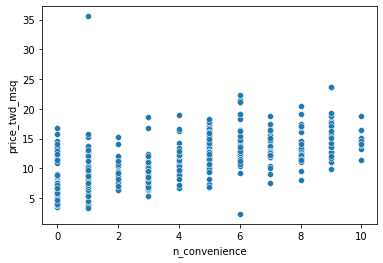

In [4]:
sns.scatterplot(x='n_convenience', y='price_twd_msq', data=taiwan_real_estate);

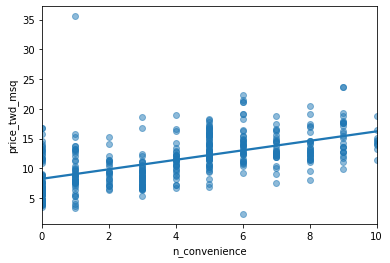

In [5]:
# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience
sns.regplot(x='n_convenience',
         y='price_twd_msq',
         data=taiwan_real_estate,
         ci=None,
         scatter_kws={'alpha': 0.5});


In [6]:
# Import the ols function
from statsmodels.formula.api import ols

# Create the model object
mdl_price_vs_conv = ols('price_twd_msq ~ n_convenience', data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


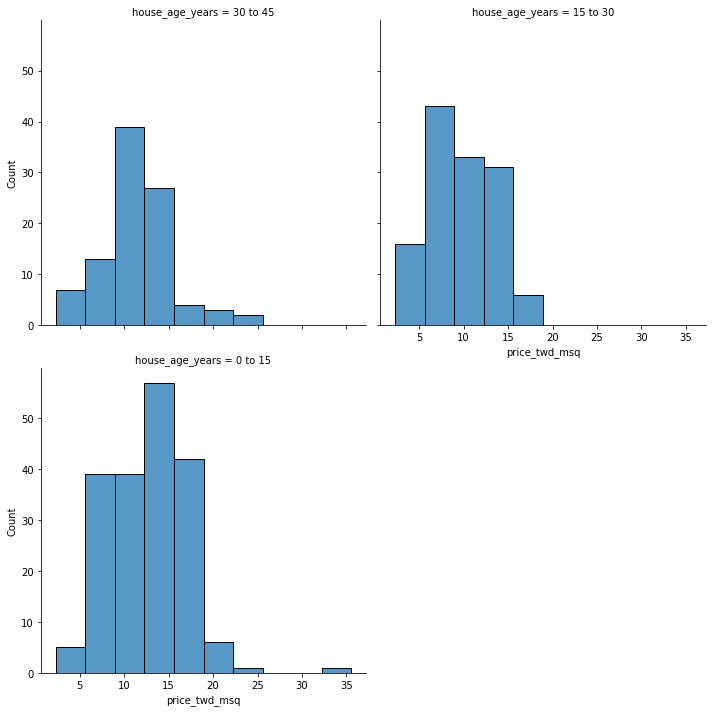

In [7]:
# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(data=taiwan_real_estate,
         x='price_twd_msq',
         col='house_age_years',
         col_wrap=2, bins=10)

# Show the plot
plt.show()

## Linear regression with a categorical explanatory variable

In [8]:
# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = taiwan_real_estate.groupby('house_age_years')['price_twd_msq'].mean()

# Print the result
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


In [9]:
# Create the model, fit it
mdl_price_vs_age = ols('price_twd_msq ~ house_age_years', data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


In [10]:
# Update the model formula to remove the intercept
mdl_price_vs_age0 = ols("price_twd_msq ~ house_age_years + 0", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age0.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


In [11]:
taiwan_real_estate['n_convenience'].unique()

array([10,  9,  5,  3,  7,  6,  1,  4,  2,  8,  0], dtype=int64)

## Predicting house prices

In [12]:
# Create the explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0,11)})

# Print it
print(explanatory_data)

    n_convenience
0               0
1               1
2               2
3               3
4               4
5               5
6               6
7               7
8               8
9               9
10             10


In [13]:
# Create explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)})

# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

# Print it
print(price_twd_msq)

0      8.224237
1      9.022317
2      9.820397
3     10.618477
4     11.416556
5     12.214636
6     13.012716
7     13.810795
8     14.608875
9     15.406955
10    16.205035
dtype: float64


In [14]:
# Create prediction_data
prediction_data = explanatory_data.assign(
    price_twd_msq = price_twd_msq)

# Print the result
print(prediction_data)

    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


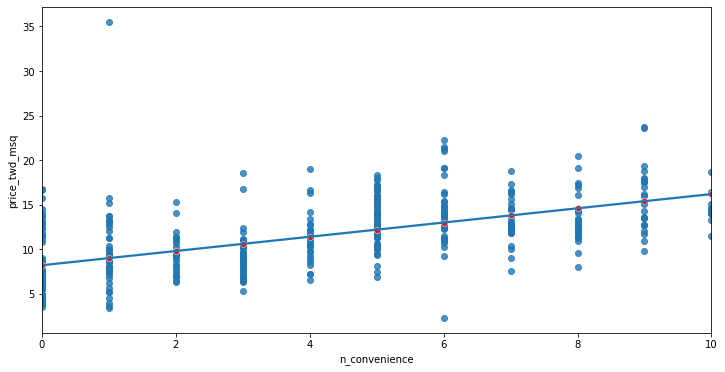

In [15]:
# Create a new figure, fig
fig = plt.figure(figsize=(12,6))

sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci=None)
# Add a scatter plot layer to the regplot
sns.scatterplot(x='n_convenience', y='price_twd_msq', data=prediction_data, color='red')

# Show the layered plot
plt.show()

## The limits of prediction

In [16]:
# Define a DataFrame impossible
impossible = pd.DataFrame({"n_convenience": [-1, 2.5]})

In [17]:
# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(impossible)

# Print it
print(price_twd_msq)

0     7.426158
1    10.219437
dtype: float64


In [18]:
# Create prediction_data
impossible_prediction_data = impossible.assign(
    price_twd_msq = price_twd_msq)

# Print the result
print(prediction_data)

    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


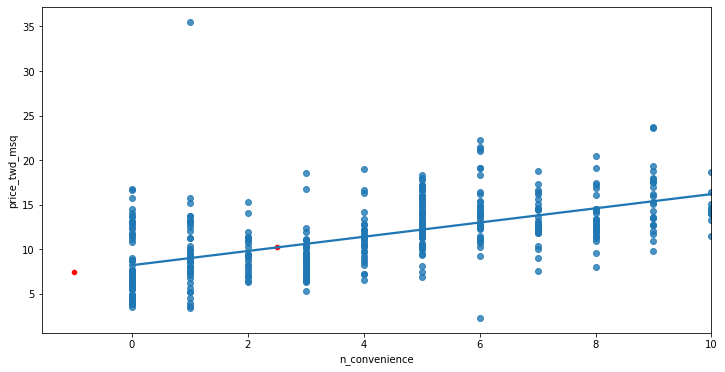

In [19]:
# Create a new figure, fig
fig = plt.figure(figsize=(12,6))

sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci=None)
# Add a scatter plot layer to the regplot
sns.scatterplot(x='n_convenience', y='price_twd_msq', data=impossible_prediction_data, color='red')

# Show the layered plot
plt.show()

## Extracting model elements

In [20]:
# Print the model parameters of mdl_price_vs_conv
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


In [21]:
print(mdl_price_vs_conv.fittedvalues)


0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64


In [22]:
print(mdl_price_vs_conv.resid)

0     -4.737561
1     -2.638422
2      2.097013
3      4.366302
4      0.826211
         ...   
409   -3.564631
410   -0.278362
411   -1.526378
412    3.670387
413    3.927387
Length: 414, dtype: float64


In [23]:
print(mdl_price_vs_conv.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Tue, 10 May 2022   Prob (F-statistic):           3.41e-37
Time:                        08:57:43   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2242      0.285     28.857

## Manually predicting house prices

In [24]:
explanatory_data

,n_convenience
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [25]:
# Get the coefficients of mdl_price_vs_conv
coeffs = mdl_price_vs_conv.params

# Get the intercept
intercept = coeffs[0]

# Get the slope
slope = coeffs[1]

# Manually calculate the predictions
price_twd_msq = intercept + slope * explanatory_data 
print(price_twd_msq)

# Compare to the results from .predict()
print(price_twd_msq.assign(predictions_auto=mdl_price_vs_conv.predict(explanatory_data)))

    n_convenience
0        8.224237
1        9.022317
2        9.820397
3       10.618477
4       11.416556
5       12.214636
6       13.012716
7       13.810795
8       14.608875
9       15.406955
10      16.205035
    n_convenience  predictions_auto
0        8.224237          8.224237
1        9.022317          9.022317
2        9.820397          9.820397
3       10.618477         10.618477
4       11.416556         11.416556
5       12.214636         12.214636
6       13.012716         13.012716
7       13.810795         13.810795
8       14.608875         14.608875
9       15.406955         15.406955
10      16.205035         16.205035


## Plotting consecutive portfolio returns

In [26]:
sp500_yearly_returns = pd.read_csv('sp500_yearly_returns.csv')

In [27]:
sp500_yearly_returns.head()

,symbol,return_2018,return_2019
0,AAPL,-0.053902,0.889578
1,MSFT,0.207953,0.575581
2,AMZN,0.284317,0.230278
3,FB,-0.257112,0.565718
4,GOOGL,-0.008012,0.281762


In [28]:
sp500_yearly_returns.describe()

,return_2018,return_2019
count,493.000000,493.000000
mean,-0.048695,0.320343
std,0.228155,0.248041
min,-0.576078,-0.475172
25%,-0.206344,0.166464
50%,-0.057428,0.305857
75%,0.068880,0.444273
max,1.326161,1.484291


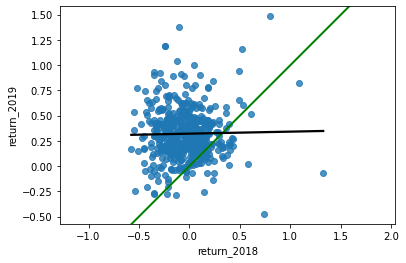

In [29]:
# Create a new figure, fig
fig = plt.figure()

# Plot the first layer: y = x
plt.axline(xy1=(0,0), slope=1, linewidth=2, color="green")

# Add scatter plot with linear regression trend line
sns.regplot(x='return_2018', y='return_2019', data=sp500_yearly_returns, ci =None, line_kws={'color': 'black'})

# Set the axes so that the distances along the x and y axes look the same
plt.axis('equal')

# Show the plot
plt.show()

In [30]:
# Run a linear regression on return_2019 vs. return_2018 using sp500_yearly_returns
mdl_returns = ols('return_2019 ~ return_2018', data=sp500_yearly_returns).fit()

# Print the parameters
print(mdl_returns.params)

Intercept      0.321321
return_2018    0.020069
dtype: float64


In [31]:
# Create a DataFrame with return_2018 at -1, 0, and 1 
explanatory_data = pd.DataFrame({'return_2018': [-1,0,1]})

# Use mdl_returns to predict with explanatory_data
print(mdl_returns.predict(explanatory_data))

0    0.301251
1    0.321321
2    0.341390
dtype: float64


In [32]:
return_2018_to_2019 = mdl_returns.predict(explanatory_data)
return_2018_to_2019

0    0.301251
1    0.321321
2    0.341390
dtype: float64

In [33]:
# Create prediction_data
prediction_data = explanatory_data.assign(
    return_2018_to_2019 = return_2018_to_2019)

# Print the result
print(prediction_data)

   return_2018  return_2018_to_2019
0           -1             0.301251
1            0             0.321321
2            1             0.341390


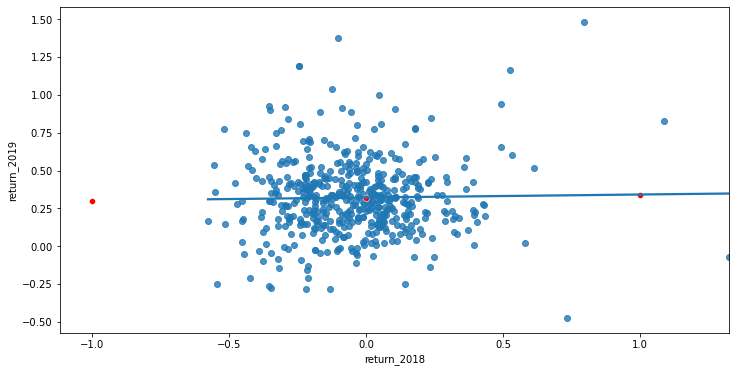

In [34]:
# Create a new figure, fig
fig = plt.figure(figsize=(12,6))

sns.regplot(x="return_2018",
            y="return_2019",
            data=sp500_yearly_returns,
            ci=None)
# Add a scatter plot layer to the regplot
sns.scatterplot(x='return_2018', y='return_2018_to_2019', data=prediction_data, color='red')

# Show the layered plot
plt.show()

## Transforming the explanatory variable

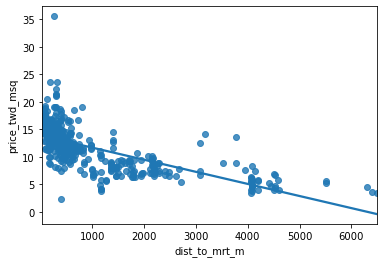

In [35]:
sns.regplot(x='dist_to_mrt_m', y='price_twd_msq', data=taiwan_real_estate, ci = None)
plt.show()

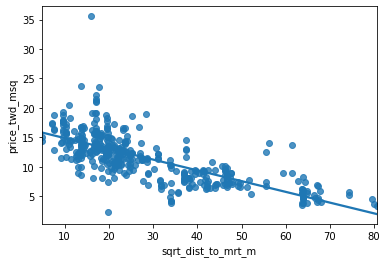

In [36]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

plt.figure()

# Plot using the transformed variable
sns.regplot(x='sqrt_dist_to_mrt_m', y='price_twd_msq', data=taiwan_real_estate, ci = None)
plt.show()

In [37]:
# Run a linear regression of price_twd_msq vs. square root of dist_to_mrt_m using taiwan_real_estate
mdl_price_vs_dist = ols('price_twd_msq ~sqrt_dist_to_mrt_m', data=taiwan_real_estate).fit()

# Print the parameters
print(mdl_price_vs_dist.params)

Intercept             16.709799
sqrt_dist_to_mrt_m    -0.182843
dtype: float64


In [38]:
explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

# Create prediction_data by adding a column of predictions to explantory_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

# Print the result
print(prediction_data)

   sqrt_dist_to_mrt_m  dist_to_mrt_m  price_twd_msq
0                 0.0              0      16.709799
1                10.0            100      14.881370
2                20.0            400      13.052942
3                30.0            900      11.224513
4                40.0           1600       9.396085
5                50.0           2500       7.567656
6                60.0           3600       5.739227
7                70.0           4900       3.910799
8                80.0           6400       2.082370


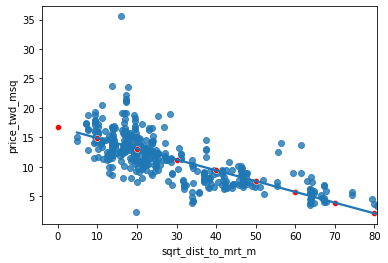

In [39]:
fig = plt.figure()
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x='sqrt_dist_to_mrt_m', y='price_twd_msq', data=prediction_data, color='red')
plt.show()

## Transforming the response variable too

In [40]:
ad_conversion = pd.read_csv('ad_conversion.csv')
ad_conversion.head()

,spent_usd,n_impressions,n_clicks
0,1.43,7350,1
1,1.82,17861,2
2,1.25,4259,1
3,1.29,4133,1
4,4.77,15615,3


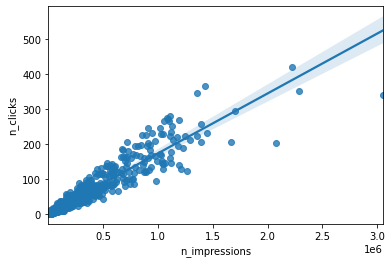

In [41]:
sns.regplot(x='n_impressions', y='n_clicks', data=ad_conversion)
plt.show()

<Figure size 864x432 with 0 Axes>

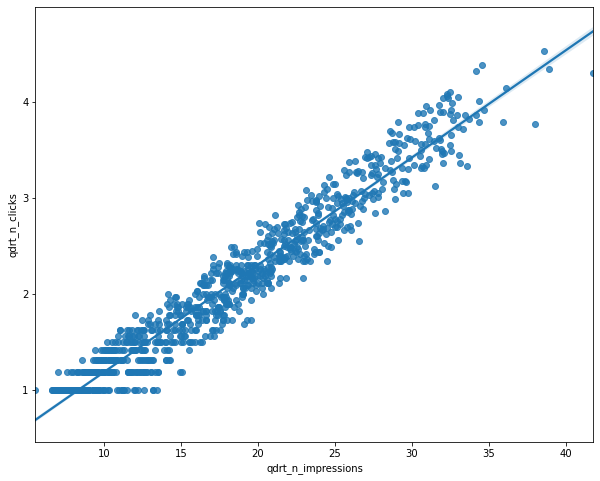

In [42]:
# Create qdrt_n_impressions and qdrt_n_clicks
fig = plt.figure(figsize=(12,6))
ad_conversion["qdrt_n_impressions"] = ad_conversion['n_impressions']**.25
ad_conversion["qdrt_n_clicks"] = ad_conversion['n_clicks']**.25

plt.figure(figsize=(10,8))

# Plot using the transformed variables
sns.regplot(x='qdrt_n_impressions', y='qdrt_n_clicks', data=ad_conversion)
plt.show()

In [43]:
# Run a linear regression of your transformed variables
mdl_click_vs_impression = ols('qdrt_n_clicks ~ qdrt_n_impressions', data=ad_conversion).fit()

In [44]:
explanatory_data = pd.DataFrame({"qdrt_n_impressions": np.arange(0, 3e6+1, 5e5) ** .25,
                                 "n_impressions": np.arange(0, 3e6+1, 5e5)})

# Complete prediction_data
prediction_data = explanatory_data.assign(
    qdrt_n_clicks = mdl_click_vs_impression.predict(explanatory_data))
# Print the result
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks
0            0.000000            0.0       0.071748
1           26.591479       500000.0       3.037576
2           31.622777      1000000.0       3.598732
3           34.996355      1500000.0       3.974998
4           37.606031      2000000.0       4.266063
5           39.763536      2500000.0       4.506696
6           41.617915      3000000.0       4.713520


## Back transformation

In [45]:
# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data['qdrt_n_clicks']**4
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks    n_clicks
0            0.000000            0.0       0.071748    0.000026
1           26.591479       500000.0       3.037576   85.135121
2           31.622777      1000000.0       3.598732  167.725102
3           34.996355      1500000.0       3.974998  249.659131
4           37.606031      2000000.0       4.266063  331.214159
5           39.763536      2500000.0       4.506696  412.508546
6           41.617915      3000000.0       4.713520  493.607180


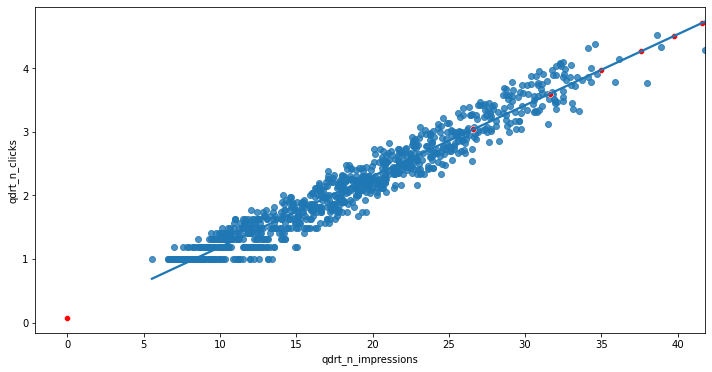

In [46]:
# Plot the transformed variables
fig = plt.figure(figsize=(12,6))
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x='qdrt_n_impressions', y='qdrt_n_clicks', data=prediction_data, color='red')
plt.show()

## Coefficient of determination

In [47]:
# Run a linear regression of your origin variables
mdl_click_vs_impression_orig = ols('n_clicks ~ n_impressions', data=ad_conversion).fit()

# Print a summary of mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.summary())


                            OLS Regression Results                            
Dep. Variable:               n_clicks   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     7683.
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        08:57:49   Log-Likelihood:                -4126.7
No. Observations:                 936   AIC:                             8257.
Df Residuals:                     934   BIC:                             8267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6829      0.789      2.133

In [48]:
mdl_click_vs_impression_trans = mdl_click_vs_impression

# Print a summary of mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.summary())



                            OLS Regression Results                            
Dep. Variable:          qdrt_n_clicks   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 1.590e+04
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        08:57:49   Log-Likelihood:                 193.90
No. Observations:                 936   AIC:                            -383.8
Df Residuals:                     934   BIC:                            -374.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0717      0

In [49]:
# Print the coeff of determination for mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.rsquared)

# Print the coeff of determination for mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.rsquared)


0.8916134973508041
0.9445272817143905


## Residual standard error


In [50]:
# Calculate mse_orig for mdl_click_vs_impression_orig
mse_orig = mdl_click_vs_impression_orig.mse_resid

# Calculate rse_orig for mdl_click_vs_impression_orig and print it
rse_orig = np.sqrt(mse_orig)
print("RSE of original model: ", rse_orig)

# Calculate mse_trans for mdl_click_vs_impression_trans
mse_trans = mdl_click_vs_impression_trans.mse_resid

# Calculate rse_trans for mdl_click_vs_impression_trans and print it
rse_trans = np.sqrt(mse_trans)
print("RSE of transformed model: ", rse_trans)

RSE of original model:  19.905838862478138
RSE of transformed model:  0.19690640896875725


## Drawing diagnostic plots 

In [51]:
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq,sqrt_dist_to_mrt_m
0,84.87882,10,30 to 45,11.467474,9.212970
1,306.59470,9,15 to 30,12.768533,17.509846
2,561.98450,5,0 to 15,14.311649,23.706212
3,561.98450,5,0 to 15,16.580938,23.706212
4,390.56840,5,0 to 15,13.040847,19.762803


In [52]:
mdl_price_vs_conv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Tue, 10 May 2022   Prob (F-statistic):           3.41e-37
Time:                        08:57:49   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2242      0.285     28.857      0.000       7.664       8.784
n_convenience     0.7981      0.057     14.118      0.000       0.687       0.909
==============================================================================
Omnibus:                      171.927   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1417.242
Skew:                           1.553   Prob(JB):                    1.78e-308
Kurtosis:                      11.516   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
mdl_price_vs_conv.params

Intercept        8.224237
n_convenience    0.798080
dtype: float64

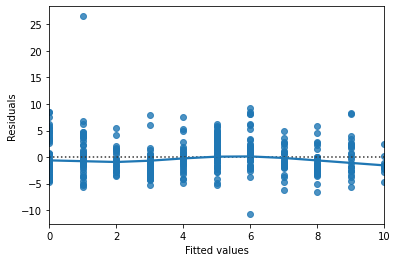

In [54]:
# Plot the residuals vs. fitted values
sns.residplot(x='n_convenience', y='price_twd_msq', data=taiwan_real_estate, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

# Show the plot
plt.show()


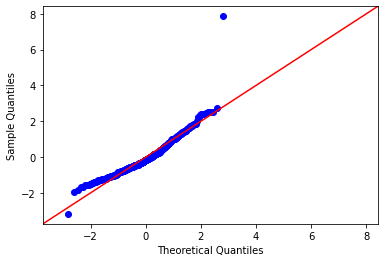

In [55]:
# Import qqplot
from statsmodels.api import qqplot

# Create the Q-Q plot of the residuals
qqplot(data=mdl_price_vs_conv.resid, fit=True, line="45")

# Show the plot
plt.show()

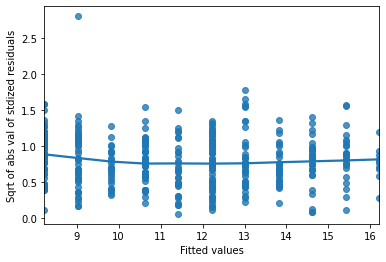

In [56]:
# Preprocessing steps
model_norm_residuals = mdl_price_vs_conv.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# Create the scale-location plot
sns.regplot(x=mdl_price_vs_conv.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")

# Show the plot
plt.show()


## Extracting leverage and influence

In [57]:
mdl_price_vs_dist.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          price_twd_msq   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     469.7
Date:                Tue, 10 May 2022   Prob (F-statistic):           4.55e-70
Time:                        08:57:54   Log-Likelihood:                -1015.3
No. Observations:                 414   AIC:                             2035.
Df Residuals:                     412   BIC:                             2043.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             16.7098      0.278     60.163      0.000      16.164      17.256
sqrt_dist_to_mrt_m    -0.1828      0.008    -21.674      0.000      -0.199      -0.166
==============================================================================
Omnibus:                      169.655   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1645.827
Skew:                           1.470   Prob(JB):                         0.00
Kurtosis:                      12.315   Cond. No.                         66.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

In [59]:
summary_info.head()

,dfb_Intercept,dfb_sqrt_dist_to_mrt_m,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.094893,0.073542,4.648246e-03,-1.266363,0.005764,-0.096418,-1.267294,-0.096489
1,-0.013981,0.008690,1.216711e-04,-0.262996,0.003506,-0.015599,-0.262699,-0.015582
2,0.025510,-0.009963,6.231096e-04,0.688143,0.002625,0.035302,0.687703,0.035279
3,0.055525,-0.021686,2.939394e-03,1.494602,0.002625,0.076673,1.496850,0.076789
4,-0.000932,0.000518,6.055123e-07,-0.019716,0.003106,-0.001100,-0.019692,-0.001099


In [60]:
summary_info['hat_diag']

0      0.005764
1      0.003506
2      0.002625
3      0.002625
4      0.003106
         ...   
409    0.013619
410    0.005661
411    0.003104
412    0.005418
413    0.005661
Name: hat_diag, Length: 414, dtype: float64

In [61]:
# Add the hat_diag column to taiwan_real_estate, name it leverage
taiwan_real_estate["leverage"] = summary_info['hat_diag']

# Sort taiwan_real_estate by leverage in descending order and print the head
taiwan_real_estate.sort_values('leverage', ascending=False).head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq,sqrt_dist_to_mrt_m,leverage
347,6488.021,1,15 to 30,3.388805,80.548253,0.026665
116,6396.283,1,30 to 45,3.691377,79.976765,0.026135
249,6306.153,1,15 to 30,4.538578,79.411290,0.025617
255,5512.038,1,30 to 45,5.264750,74.243101,0.021142
8,5512.038,1,30 to 45,5.688351,74.243101,0.021142


In [62]:
# Add the cooks_d column to taiwan_real_estate, name it cooks_dist
taiwan_real_estate['cooks_dist'] = summary_info['cooks_d']

# Sort taiwan_real_estate by cooks_dist in descending order and print the head.
taiwan_real_estate.sort_values('cooks_dist', ascending=False).head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq,sqrt_dist_to_mrt_m,leverage,cooks_dist
270,252.5822,1,0 to 15,35.552194,15.892835,0.003849,0.115549
148,3780.5900,0,15 to 30,13.645991,61.486503,0.012147,0.052440
228,3171.3290,0,0 to 15,14.099849,56.314554,0.009332,0.035384
220,186.5101,9,30 to 45,23.691377,13.656870,0.004401,0.025123
113,393.2606,6,0 to 15,2.299546,19.830799,0.003095,0.022813


In [63]:
taiwan_real_estate.loc[[270]]

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq,sqrt_dist_to_mrt_m,leverage,cooks_dist
270,252.5822,1,0 to 15,35.552194,15.892835,0.003849,0.115549


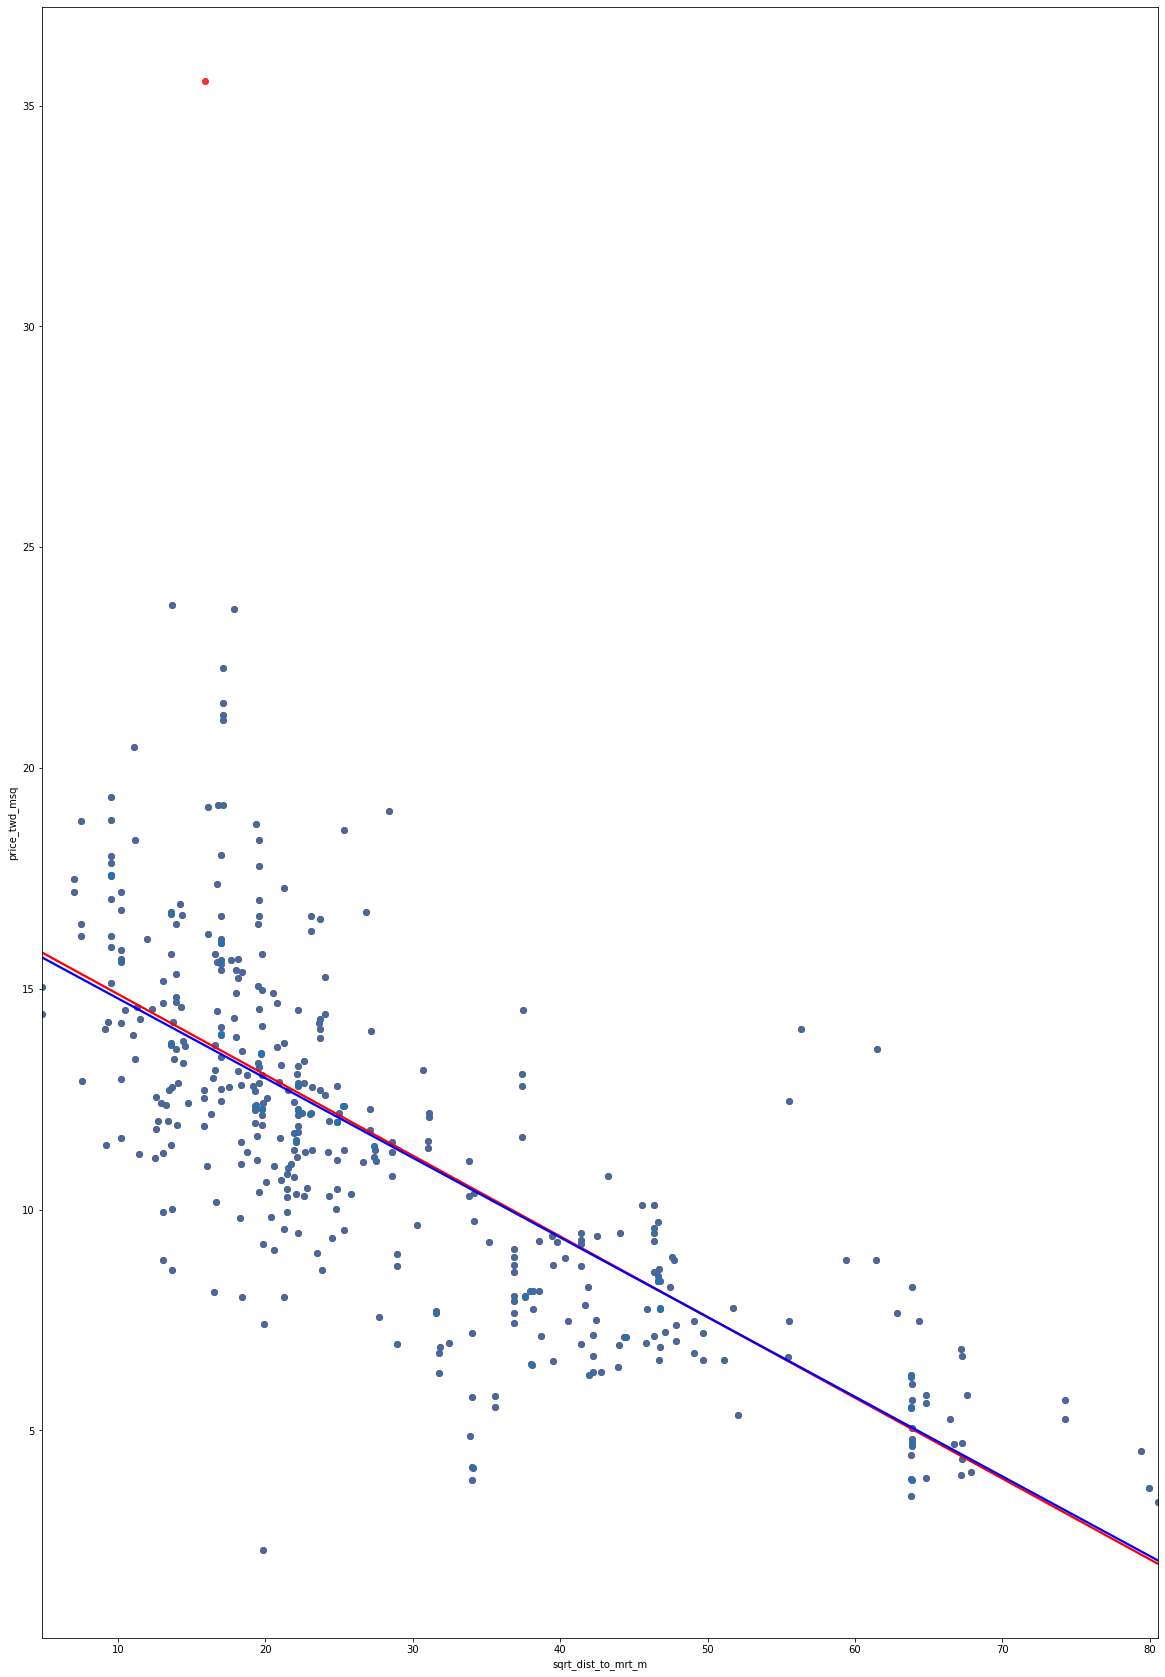

In [64]:
taiwan_real_estate_not_extreme = taiwan_real_estate[taiwan_real_estate.index != 270] 

fig = plt.figure(figsize=(20,30))
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None, color='red')

# Add a layer of your prediction points
#sns.scatterplot(x='sqrt_dist_to_mrt_m', y='price_twd_msq', data=prediction_data, color='gold')

sns.regplot(x='sqrt_dist_to_mrt_m',y='price_twd_msq',data=taiwan_real_estate_not_extreme,ci=None, line_kws={"color": "blue"})
plt.show()



In [65]:
# Run a linear regression of price_twd_msq vs. square root of dist_to_mrt_m using taiwan_real_estate
mdl_price_vs_dist = ols('price_twd_msq ~sqrt_dist_to_mrt_m', data=taiwan_real_estate).fit()

# Print the parameters
print(mdl_price_vs_dist.params)

Intercept             16.709799
sqrt_dist_to_mrt_m    -0.182843
dtype: float64


In [66]:
# Run a linear regression of price_twd_msq vs. square root of dist_to_mrt_m using taiwan_real_estate
mdl_price_vs_dist = ols('price_twd_msq ~sqrt_dist_to_mrt_m', data=taiwan_real_estate_not_extreme).fit()

# Print the parameters
print(mdl_price_vs_dist.params)

Intercept             16.586430
sqrt_dist_to_mrt_m    -0.180368
dtype: float64


## Exploring the explanatory variables

In [67]:
churn = pd.read_csv('churn.csv')
churn.head()

,has_churned,time_since_first_purchase,time_since_last_purchase
0,0,-1.089221,-0.721322
1,0,1.182983,3.634435
2,0,-0.846156,-0.427582
3,0,0.086942,-0.535672
4,0,-1.166642,-0.672640


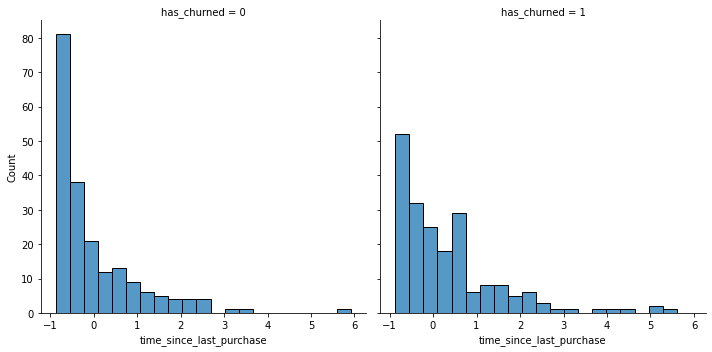

In [68]:
# Create the histograms of time_since_last_purchase split by has_churned
sns.displot(x='time_since_last_purchase', col='has_churned', data=churn)

plt.show()

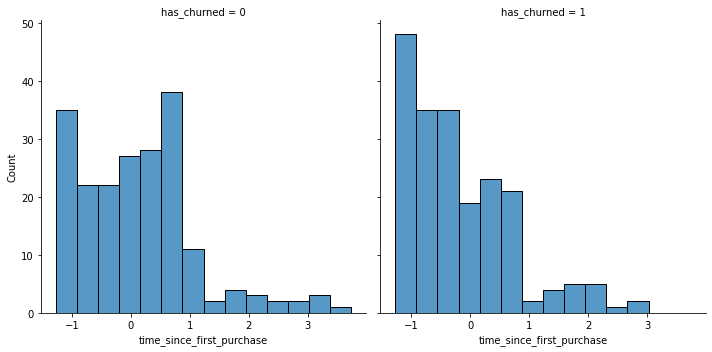

In [69]:
sns.displot(x='time_since_first_purchase', col='has_churned', data=churn)

plt.show()

## Visualizing linear and logistic models

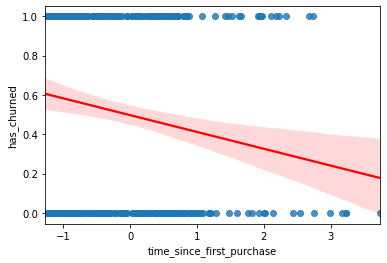

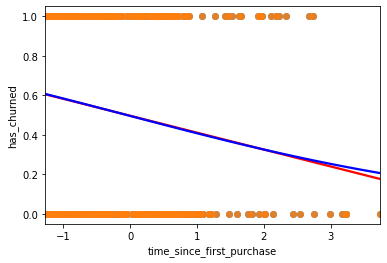

In [70]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(y='has_churned', x='time_since_first_purchase', data=churn,
            line_kws={"color": "red"})

plt.show()
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn, 
            ci=None,
            line_kws={"color": "red"})

# Draw a logistic regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x='time_since_first_purchase', y='has_churned', data=churn, ci=None, logistic=True, line_kws={'color' : 'blue'})

plt.show()

## Logistic regression with logit()

In [71]:
# Import logit
from statsmodels.formula.api import logit

# Fit a logistic regression of churn vs. length of relationship using the churn dataset
mdl_churn_vs_relationship = logit('has_churned ~ time_since_first_purchase', data=churn).fit()

# Print the parameters of the fitted model
print(mdl_churn_vs_relationship.params)

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4
Intercept                   -0.015185
time_since_first_purchase   -0.354795
dtype: float64


## Probabilities

In [72]:
# Create prediction_data
explanatory_data = pd.DataFrame({"time_since_first_purchase": np.arange(-1, 4.25, 0.25)})

In [73]:
# Create prediction_data
prediction_data = explanatory_data.assign(
  has_churned = mdl_churn_vs_relationship.predict(explanatory_data))

# Print the head
print(prediction_data.head(5))

   time_since_first_purchase  has_churned
0                      -1.00     0.584096
1                      -0.75     0.562401
2                      -0.50     0.540465
3                      -0.25     0.518370
4                       0.00     0.496204


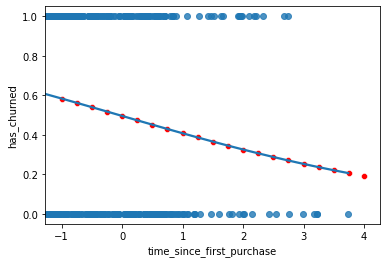

In [74]:
# Create a scatter plot with logistic trend line
sns.regplot(x='time_since_first_purchase', y='has_churned', data=churn, ci=None,logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(x='time_since_first_purchase', y='has_churned', data=prediction_data, color='red')

plt.show()

In [75]:
# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data['has_churned'])

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned  most_likely_outcome
0                      -1.00     0.584096                  1.0
1                      -0.75     0.562401                  1.0
2                      -0.50     0.540465                  1.0
3                      -0.25     0.518370                  1.0
4                       0.00     0.496204                  0.0


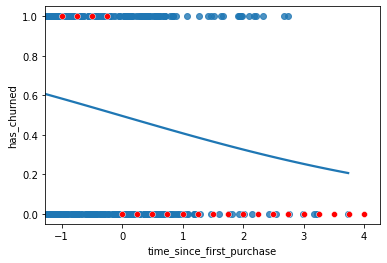

In [76]:
fig = plt.figure()

# Create a scatter plot with logistic trend line (from previous exercise)
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(x='time_since_first_purchase', y='most_likely_outcome', data=prediction_data, color='red')

plt.show()

## Odds ratio

In [77]:
# Update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data['has_churned']/(1-prediction_data['has_churned'])

# Print the head
print(prediction_data.head(5))

   time_since_first_purchase  has_churned  most_likely_outcome  odds_ratio
0                      -1.00     0.584096                  1.0    1.404400
1                      -0.75     0.562401                  1.0    1.285197
2                      -0.50     0.540465                  1.0    1.176111
3                      -0.25     0.518370                  1.0    1.076284
4                       0.00     0.496204                  0.0    0.984930


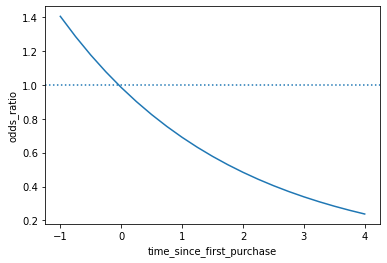

In [78]:
# Create a line plot of odds_ratio vs time_since_first_purchase
sns.lineplot(x='time_since_first_purchase', y='odds_ratio', data=prediction_data)

# Add a dotted horizontal line at odds_ratio = 1
plt.axhline(y=1, linestyle="dotted");

## Log odds ratio

In [79]:
# Update prediction data with log_odds_ratio
prediction_data['log_odds_ratio'] = np.log(prediction_data['odds_ratio'])
 
# Print the head
print(prediction_data.head(5))

   time_since_first_purchase  has_churned  most_likely_outcome  odds_ratio  \
0                      -1.00     0.584096                  1.0    1.404400   
1                      -0.75     0.562401                  1.0    1.285197   
2                      -0.50     0.540465                  1.0    1.176111   
3                      -0.25     0.518370                  1.0    1.076284   
4                       0.00     0.496204                  0.0    0.984930   

   log_odds_ratio  
0        0.339610  
1        0.250912  
2        0.162213  
3        0.073514  
4       -0.015185  


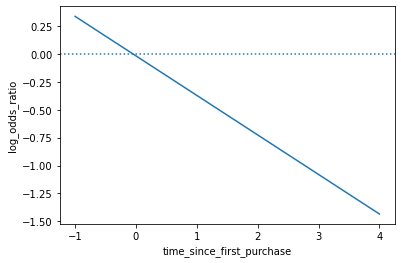

In [80]:
# Update the line plot: log_odds_ratio vs. time_since_first_purchase
sns.lineplot(x="time_since_first_purchase",
             y="log_odds_ratio",
             data=prediction_data)

# Add a dotted horizontal line at log_odds_ratio = 0
plt.axhline(y=0, linestyle="dotted")

plt.show()



## Calculating the confusion matrix

In [81]:
# Get the actual responses
actual_response = churn['has_churned']

# Get the predicted responses
predicted_response = np.round(mdl_churn_vs_relationship.predict())

# Create outcomes as a DataFrame of both Series
outcomes = pd.DataFrame({'actual_response': actual_response, 'predicted_response': predicted_response})

# Print the outcomes
print(outcomes.value_counts(sort = False))

actual_response  predicted_response
0                0.0                   112
                 1.0                    88
1                0.0                    76
                 1.0                   124
dtype: int64


In [82]:
from statsmodels.graphics.mosaicplot import mosaic


[[112.  88.]
 [ 76. 124.]]


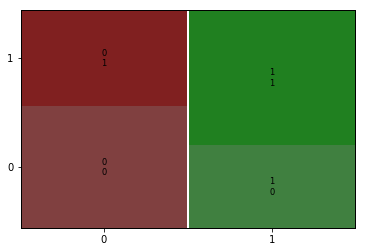

In [83]:
# Import mosaic from statsmodels.graphics.mosaicplot
from statsmodels.graphics.mosaicplot import mosaic

# Calculate the confusion matrix conf_matrix
conf_matrix = mdl_churn_vs_relationship.pred_table()

# Print it
print(conf_matrix)

# Draw a mosaic plot of conf_matrix
mosaic(conf_matrix)
plt.show()

## Measuring logistic model performance

In [84]:
# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# Calculate and print the accuracy
accuracy = (TN + TP)/(TN+FN+FP+TP)
print("accuracy: ", accuracy)

# Calculate and print the sensitivity
sensitivity = TP/(TP+FN)
print("sensitivity: ", sensitivity)

# Calculate and print the specificity
specificity = TN/(TN+FP)
print("specificity: ", specificity)


accuracy:  0.59
sensitivity:  0.62
specificity:  0.56
